本文解读sklearn中ensemble的代码

主要内容包括：
- 功能1：基本的分类器
- 功能2：重要属性和函数
- 功能3：自定义路径返回
- 功能4：自定义获取节点信息

主要参考文献：
- Random Forest Classifier Example. https://chrisalbon.com/machine-learning/random_forest_classifier_example_scikit.html
- ./SklearnTree.ipynb

# 功能1：基本的分类器

In [30]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import graphviz 
from sklearn import tree
np.random.seed(0)

In [3]:
# Create an object called iris with the iris data
iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [6]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [7]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 118
Number of observations in the test data: 32


In [8]:
# Create a list of the feature column's names
features = df.columns[:4]

# View features
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [9]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['species'])[0]

# View target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int64)

In [10]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [12]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [13]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0.9,  0.1,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ]])

# 功能2：重要属性和函数

In [18]:
clf.estimators_[:2] #所有的决策树分类器

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=209652396, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=398764591, splitter='best')]

In [27]:
clf.n_features_ # 特征数量
clf.base_estimator # ???
clf.classes_

array([0, 1, 2], dtype=int64)

In [25]:
estimator = clf.estimators_[0]

In [26]:
# tree 中的重要属性
n_nodes = estimator.tree_.node_count # 树的节点个数
children_left = estimator.tree_.children_left # 所有节点的左子树索引 -1为叶子节点
children_right = estimator.tree_.children_right # 所有节点的右子树索引 -1为叶子节点
feature = estimator.tree_.feature # 所有节点的特征索引 -2为叶子节点
threshold = estimator.tree_.threshold # 所有节点的阈值 -2为叶子节点
value = estimator.tree_.value # 所有节点的N个类的个数 
impurity = estimator.tree_.impurity # 所有节点的不纯度
sample = estimator.tree_.n_node_samples # 所有节点所有的

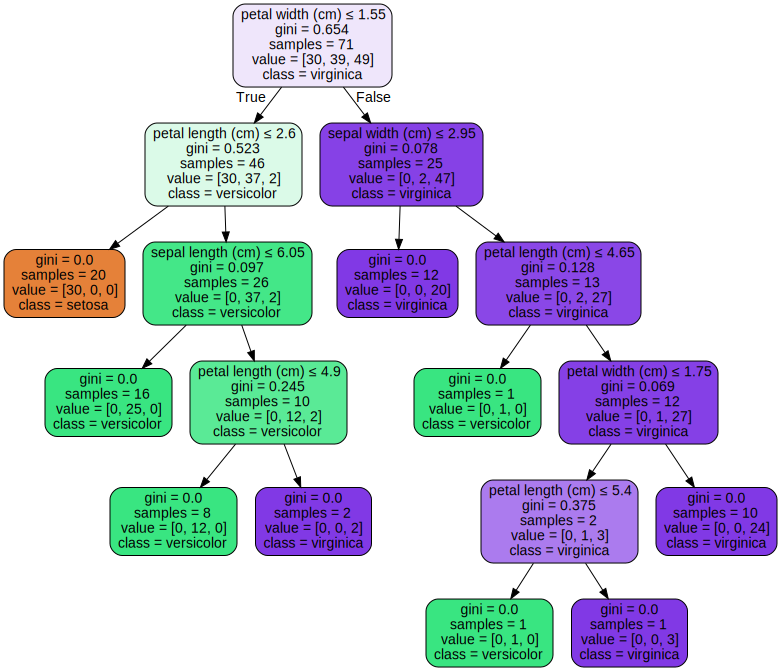

In [31]:
dot_data = tree.export_graphviz(estimator, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# 功能3：自定义路径返回

In [42]:
sample_list = test[features].iloc[:2, :]
estimator = clf.estimators_[0]
node_indicator = estimator.decision_path(sample_list) # 返回实例所经历的路径的类 node_indicator
leave_id = estimator.apply(sample_list) # 返回实例所对应的节点ID
node_indicator.indices # node_indicator的节点ID路径列表
node_indicator.toarray() # node_indicator的节点noe hot
node_indicator.indptr # node_indicator的节点在数组中的索引

array([0, 3, 6], dtype=int32)

In [90]:
feature = estimator.tree_.feature # 所有节点的特征索引 -2为叶子节点
threshold = estimator.tree_.threshold # 所有节点的阈值 -2为叶子节点
value = estimator.tree_.value # 所有节点的N个类的个数 
impurity = estimator.tree_.impurity # 所有节点的不纯度
sample = estimator.tree_.n_node_samples # 所有节点所有的

17

In [47]:
sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]
node_index

array([0, 1, 2], dtype=int32)

In [61]:
print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if (test[features].iloc[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"
        
    if threshold[node_id] == -2:
        print("node %s: leaf node, sample=%s, value=%s, gini=%.2f" 
              %(node_id, sample[node_id],
             value[node_id],
             impurity[node_id]))
        continue

    print("node %s: (X_test[%s, %s](= %s) %s %.2f) sample=%s, value=%s, gini=%.2f"
          % (node_id,
             sample_id,
             feature[node_id],
             test[features].iloc[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id],
             sample[node_id],
             value[node_id],
             impurity[node_id]))

Rules used to predict sample 0: 
node 0: (X_test[0, 3](= 0.2) <= 1.55) sample=71, value=[[ 30.  39.  49.]], gini=0.65
node 1: (X_test[0, 2](= 1.5) <= 2.60) sample=46, value=[[ 30.  37.   2.]], gini=0.52
node 2: leaf node, sample=20, value=[[ 30.   0.   0.]], gini=0.00


In [125]:
def print_decision_path_ofsample(estimator, item):
    sample_list = [item]
    node_indicator = estimator.decision_path(sample_list) # 返回实例所经历的路径的类 node_indicator
    leave_id = estimator.apply(sample_list) # 返回实例所对应的节点ID
    node_index = node_indicator.indices[:]
    
    feature = estimator.tree_.feature # 所有节点的特征索引 -2为叶子节点
    threshold = estimator.tree_.threshold # 所有节点的阈值 -2为叶子节点
    value = estimator.tree_.value # 所有节点的N个类的个数 
    impurity = estimator.tree_.impurity # 所有节点的不纯度
    sample = estimator.tree_.n_node_samples # 所有节点所有的
    
    for node_id in node_index:
        if (item[feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        if threshold[node_id] == -2:
            print("node %s: leaf node, sample=%s, value=%s, gini=%.2f, label=%s" 
                  %(node_id, sample[node_id],
                 value[node_id],
                 impurity[node_id],
                 np.argmax(value[node_id], axis=1)))
            continue

        print("node %s: (X_test[%s, %s](= %s) %s %.2f) sample=%s, value=%s, gini=%.2f, label=%s"
              % (node_id,
                 sample_id,
                 feature[node_id],
                 item[feature[node_id]],
                 threshold_sign,
                 threshold[node_id],
                 sample[node_id],
                 value[node_id],
                 impurity[node_id],
                 np.argmax(value[node_id], axis=1)))

In [126]:
def print_decision_path_ofsamplelist(estimator, itemlist):
    for id, item in enumerate(itemlist):
        print('Rules used to predict sample %s: ' % id)
        print_decision_path_ofsample(estimator, item)

In [103]:
print_decision_path_ofsample(clf.estimators_[0], test[features].iloc[10, :])

Rules used to predict sample 0: 
node 0: (X_test[0, 3](= 0.2) <= 1.55) sample=71, value=[[ 30.  39.  49.]], gini=0.65, label=[2]
node 1: (X_test[0, 2](= 1.5) <= 2.60) sample=46, value=[[ 30.  37.   2.]], gini=0.52, label=[1]
node 2: leaf node, sample=20, value=[[ 30.   0.   0.]], gini=0.00, label=[0]


In [106]:
clf.estimators_[0].predict_proba(test[features].iloc[10:11, :])

array([[ 1.,  0.,  0.]])

# 功能4：自定义获取节点信息

In [115]:
print_node_info(clf.estimators_[0], 2)

node 2: (feature[-2] <= -2.00) sample=20, value=[[ 30.   0.   0.]], gini=0.00, label=[0]


In [128]:
print_decision_path_ofsamplelist(clf.estimators_[0], train[features].iloc[:38, :].values)

Rules used to predict sample 0: 
node 0: (X_test[0, 3](= 0.2) <= 1.55) sample=71, value=[[ 30.  39.  49.]], gini=0.65, label=[2]
node 1: (X_test[0, 2](= 1.4) <= 2.60) sample=46, value=[[ 30.  37.   2.]], gini=0.52, label=[1]
node 2: leaf node, sample=20, value=[[ 30.   0.   0.]], gini=0.00, label=[0]
Rules used to predict sample 1: 
node 0: (X_test[0, 3](= 0.2) <= 1.55) sample=71, value=[[ 30.  39.  49.]], gini=0.65, label=[2]
node 1: (X_test[0, 2](= 1.4) <= 2.60) sample=46, value=[[ 30.  37.   2.]], gini=0.52, label=[1]
node 2: leaf node, sample=20, value=[[ 30.   0.   0.]], gini=0.00, label=[0]
Rules used to predict sample 2: 
node 0: (X_test[0, 3](= 0.2) <= 1.55) sample=71, value=[[ 30.  39.  49.]], gini=0.65, label=[2]
node 1: (X_test[0, 2](= 1.3) <= 2.60) sample=46, value=[[ 30.  37.   2.]], gini=0.52, label=[1]
node 2: leaf node, sample=20, value=[[ 30.   0.   0.]], gini=0.00, label=[0]
Rules used to predict sample 3: 
node 0: (X_test[0, 3](= 0.2) <= 1.55) sample=71, value=[[ 30.

In [118]:
return_node_dataindex(clf.estimators_[0], 2, train[features])

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

In [100]:
def print_node_info(estimator, node_id):
    feature = estimator.tree_.feature # 所有节点的特征索引 -2为叶子节点
    threshold = estimator.tree_.threshold # 所有节点的阈值 -2为叶子节点
    value = estimator.tree_.value # 所有节点的N个类的个数 
    impurity = estimator.tree_.impurity # 所有节点的不纯度
    sample = estimator.tree_.n_node_samples # 所有节点所有的
    
    assert node_id >= 0
    assert node_id < estimator.tree_.node_count
    
    threshold_sign = "<="
    print("node %s: (feature[%s] %s %.2f) sample=%s, value=%s, gini=%.2f, label=%s"
              % (node_id,
                 feature[node_id],
                 threshold_sign,
                 threshold[node_id],
                 sample[node_id],
                 value[node_id],
                 impurity[node_id],
                 np.argmax(value[node_id], axis=1)))

In [111]:
def return_node_dataindex(estimator, leaf_node_id, data):
    nodelist = estimator.apply(data) # 返回实例所对应的节点ID
    dataindex = []
    for i, id in enumerate(nodelist):
        if id == leaf_node_id: dataindex.append(i)
    return dataindex